<table>
<tr>                                                                                   
     <th>
         <div style='padding:15px;color:#0aa0aa7;font-size:240%;text-align: center;font-style: italic;font-weight: bold;font-family: Georgia, serif'>Analyse en Composantes Principales (ACP)</div>
     </th>
     <th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/logoACP.png" width="96"></th>
 </tr>
</table>

<div style='text-align: center'>
<img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/European_genetic_structure_(based_on_SNPs)_PC_analysis.png" width="512">
</div>

<div style='padding:15px;color:#aa0abA;font-size:100%;text-align: left;font-family: Georgia, serif'>
Attribuée a Karl Pearson (1901) et à Harold Hotelling (1933), l’analyse en composantes principales (ACP) constitue une application statistique de décomposition en valeurs singulières.<br>Le but de l’analyse est de remplacer ces variables d’origine par un nouvel ensemble de variables orthogonales appelées composantes principales.<br>Ces composantes sont calculées comme une combinaison linéaire des variables originales.<br>Pour éviter la redondance de l’information, on pose pour ces combinaisons linéaires les contraintes suivantes :<br> 
<div style='font-style: italic;'>- qu’elles soient indépendantes deux à deux, et</div><br>
<div style='font-style: italic;'>- que la première combinaison ait la plus grande inertie possible, puis que la deuxième combinaison ait la plus grande inertie possible après que l’inertie due a la première composante ait été éliminée, etc.</div><br>
Ainsi, une composante principale est une combinaison linéaire des colonnes d’une matrice de données ou les lignes représentent des observations.</div>

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Import libriries</div></b>

In [1]:
import pandas as pd, numpy as np, seaborn as sns, warnings, os, sys, time, copy as cp
from datetime import datetime as dt
from matplotlib import pyplot as plt

import matplotlib.font_manager as fm
import plotly.express as px
import plotly.graph_objs as go

os.chdir("C:/Users/etien/Documents/CCI/_HUB/cours/2024-2025/big_data/_git/MachineLearning/donnees")


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Outils du document</div></b>

In [3]:
repertoireRacine  = '.'
nomProjet         = 'Analyse en Composantes Principales-Méthode'

repertoireProjet  = os.path.join(repertoireRacine, nomProjet)
repertoireDonnees = os.path.join(repertoireProjet, 'repertoire.donnees')
repertoireImages  = os.path.join(repertoireProjet, 'repertoire.images')


def controleExistenceRepertoire( repertoire, create_if_needed=True):
    """Voir si le répertoire existe. S'il n'existe pas il est créé."""
    path_exists = os.path.exists(repertoire)
    if path_exists:
        if not os.path.isdir(repertoire):
            raise Exception("Trouvé le nom  "+repertoire +" mais c'est un fichier, pas un répertoire")
            # return False
        return True
    if create_if_needed:
        os.makedirs(repertoire)

def sauvegarderImage( fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    plt.savefig(os.path.join(repertoireImages,
                             fichier+f"--{dt.now().strftime('%Y_%m_%d_%H.%M.%S')}.png"), 
                             dpi=600, 
                             bbox_inches='tight')

def sauvegarderImageSNS( sns_plot, fichier):
    """Enregistrez la figure. Appelez la méthode juste avant plt.show ()."""
    controleExistenceRepertoire(repertoireImages)
    fig = sns_plot.get_figure()
    fig.savefig(os.path.join(repertoireImages,fichier+'.png'))
    
controleExistenceRepertoire(repertoireProjet)
controleExistenceRepertoire(repertoireDonnees)
controleExistenceRepertoire(repertoireImages)

True

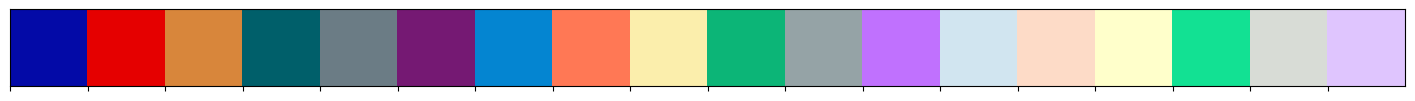

In [4]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

# <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Lecture des données</div></b>

In [5]:
donnees = pd.read_parquet("meteo France SYNOP/donnees_meteo.gzip")
donnees[['VitesseVent','Temperature','Humidite','Pression','Visibilite','Precipitation']].head()

VitesseVent  Temperature  \
Nom       Latitude Longitude Altitude Zone                             
Abbeville 50.136   1.834     69       NO            2.0         2.89   
                                      NO            3.0         2.70   
                                      NO            3.0         2.89   
                                      NO            4.1         3.60   
                                      NO            5.1         4.39   

                                            Humidite  Pression  Visibilite  \
Nom       Latitude Longitude Altitude Zone                                   
Abbeville 50.136   1.834     69       NO        99.0     990.9         NaN   
                                      NO        99.0     990.7         NaN   
                                      NO        99.0     990.9         0.1   
                                      NO        99.0     991.1         0.8   
                                      NO        99.0     990.4         1.6   

                                            Precipitation  
Nom       Latitude Longitude Altitude Zone                 
Abbeville 50.136   1.834     69       NO              0.0  
                                      NO              0.2  
                                      NO              0.0  
                                      NO              0.0  
                                      NO              0.0

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Structuration des données</div></b>
<div style='padding:15px;color:#aa0aa7;font-size:100%;text-align: left;font-family: Georgia, serif'>Les données sont structurées dans un tableau ou matrice à n lignes et p colonnes. Chacune des n lignes représente un individu et chacune des p colonnes une variable. Pour une analyse en composantes principales, la variables sont uniquement quantitatives : la matrice est donc constituée de valeurs numériques.</div> <img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/acp_representation_variables.png" width="512">

In [6]:
temperatures = donnees.reset_index().pivot_table(
                                 index=['Nom', 'Latitude', 'Longitude', 'Altitude', 'Zone'],
                                 columns='Jour',
                                 values='Temperature',  
                                 aggfunc = 'mean',
                                 sort = True)
#temperatures.columns = [str(x) for x in range(1,367)]
temperatures.columns = pd.Series(range(1,367), name='Jour').astype(str)
temperatures.to_parquet(os.path.join(repertoireDonnees,'temperatures.gzip'),compression='gzip', engine='pyarrow') 
temperatures.head()

,,,,Jour,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
Nom,Latitude,Longitude,Altitude,Zone,,,,,,,,,,,,,,,,,,,,,
Abbeville,50.136000,1.834000,69,NO,4.683491,5.295043,4.985109,5.023664,4.936724,4.831638,5.358621,5.318319,5.057155,4.239267,...,6.649353,7.180345,6.345086,5.486293,4.889569,4.258478,3.928233,4.867414,5.313405,1.851972
Ajaccio,41.918000,8.792667,5,SE,9.530172,9.859221,9.814739,9.721184,9.236379,9.420391,9.653407,9.746228,9.656320,9.552727,...,10.136767,10.170346,10.160517,9.826940,9.322987,9.013319,9.054199,8.796710,8.941595,8.144306
Alencon,48.445500,0.110167,143,NO,4.960043,5.467532,5.160431,4.959526,4.874138,4.622261,5.036897,5.344957,5.063836,4.805259,...,6.693668,7.194696,6.364675,5.169138,4.684242,4.013217,4.034267,4.799784,5.046364,2.024861
Bale,47.614333,7.510000,263,NE,2.595862,2.854440,3.106853,2.989224,2.865259,2.435172,2.876753,2.802888,2.973723,2.480776,...,4.265758,4.161126,4.038836,2.900606,2.320478,1.864224,1.998831,1.983750,2.612771,-0.188889
Bastia,42.540667,9.485167,10,SE,9.427328,10.009095,10.514498,9.778103,9.471681,9.190217,9.743553,9.835086,9.714079,9.606130,...,10.192130,10.065348,10.460796,10.374781,9.585671,8.766121,8.969526,9.074545,9.168043,7.319167


In [7]:
%%time
temperatures = pd.read_parquet(os.path.join(repertoireDonnees,'temperatures.gzip'), engine='pyarrow')
temperatures.head()

CPU times: total: 15.6 ms
Wall time: 24.3 ms


,,,,Jour,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
Nom,Latitude,Longitude,Altitude,Zone,,,,,,,,,,,,,,,,,,,,,
Abbeville,50.136000,1.834000,69,NO,4.683491,5.295043,4.985109,5.023664,4.936724,4.831638,5.358621,5.318319,5.057155,4.239267,...,6.649353,7.180345,6.345086,5.486293,4.889569,4.258478,3.928233,4.867414,5.313405,1.851972
Ajaccio,41.918000,8.792667,5,SE,9.530172,9.859221,9.814739,9.721184,9.236379,9.420391,9.653407,9.746228,9.656320,9.552727,...,10.136767,10.170346,10.160517,9.826940,9.322987,9.013319,9.054199,8.796710,8.941595,8.144306
Alencon,48.445500,0.110167,143,NO,4.960043,5.467532,5.160431,4.959526,4.874138,4.622261,5.036897,5.344957,5.063836,4.805259,...,6.693668,7.194696,6.364675,5.169138,4.684242,4.013217,4.034267,4.799784,5.046364,2.024861
Bale,47.614333,7.510000,263,NE,2.595862,2.854440,3.106853,2.989224,2.865259,2.435172,2.876753,2.802888,2.973723,2.480776,...,4.265758,4.161126,4.038836,2.900606,2.320478,1.864224,1.998831,1.983750,2.612771,-0.188889
Bastia,42.540667,9.485167,10,SE,9.427328,10.009095,10.514498,9.778103,9.471681,9.190217,9.743553,9.835086,9.714079,9.606130,...,10.192130,10.065348,10.460796,10.374781,9.585671,8.766121,8.969526,9.074545,9.168043,7.319167


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Corrélation Pearson des variables initiales</div></b>

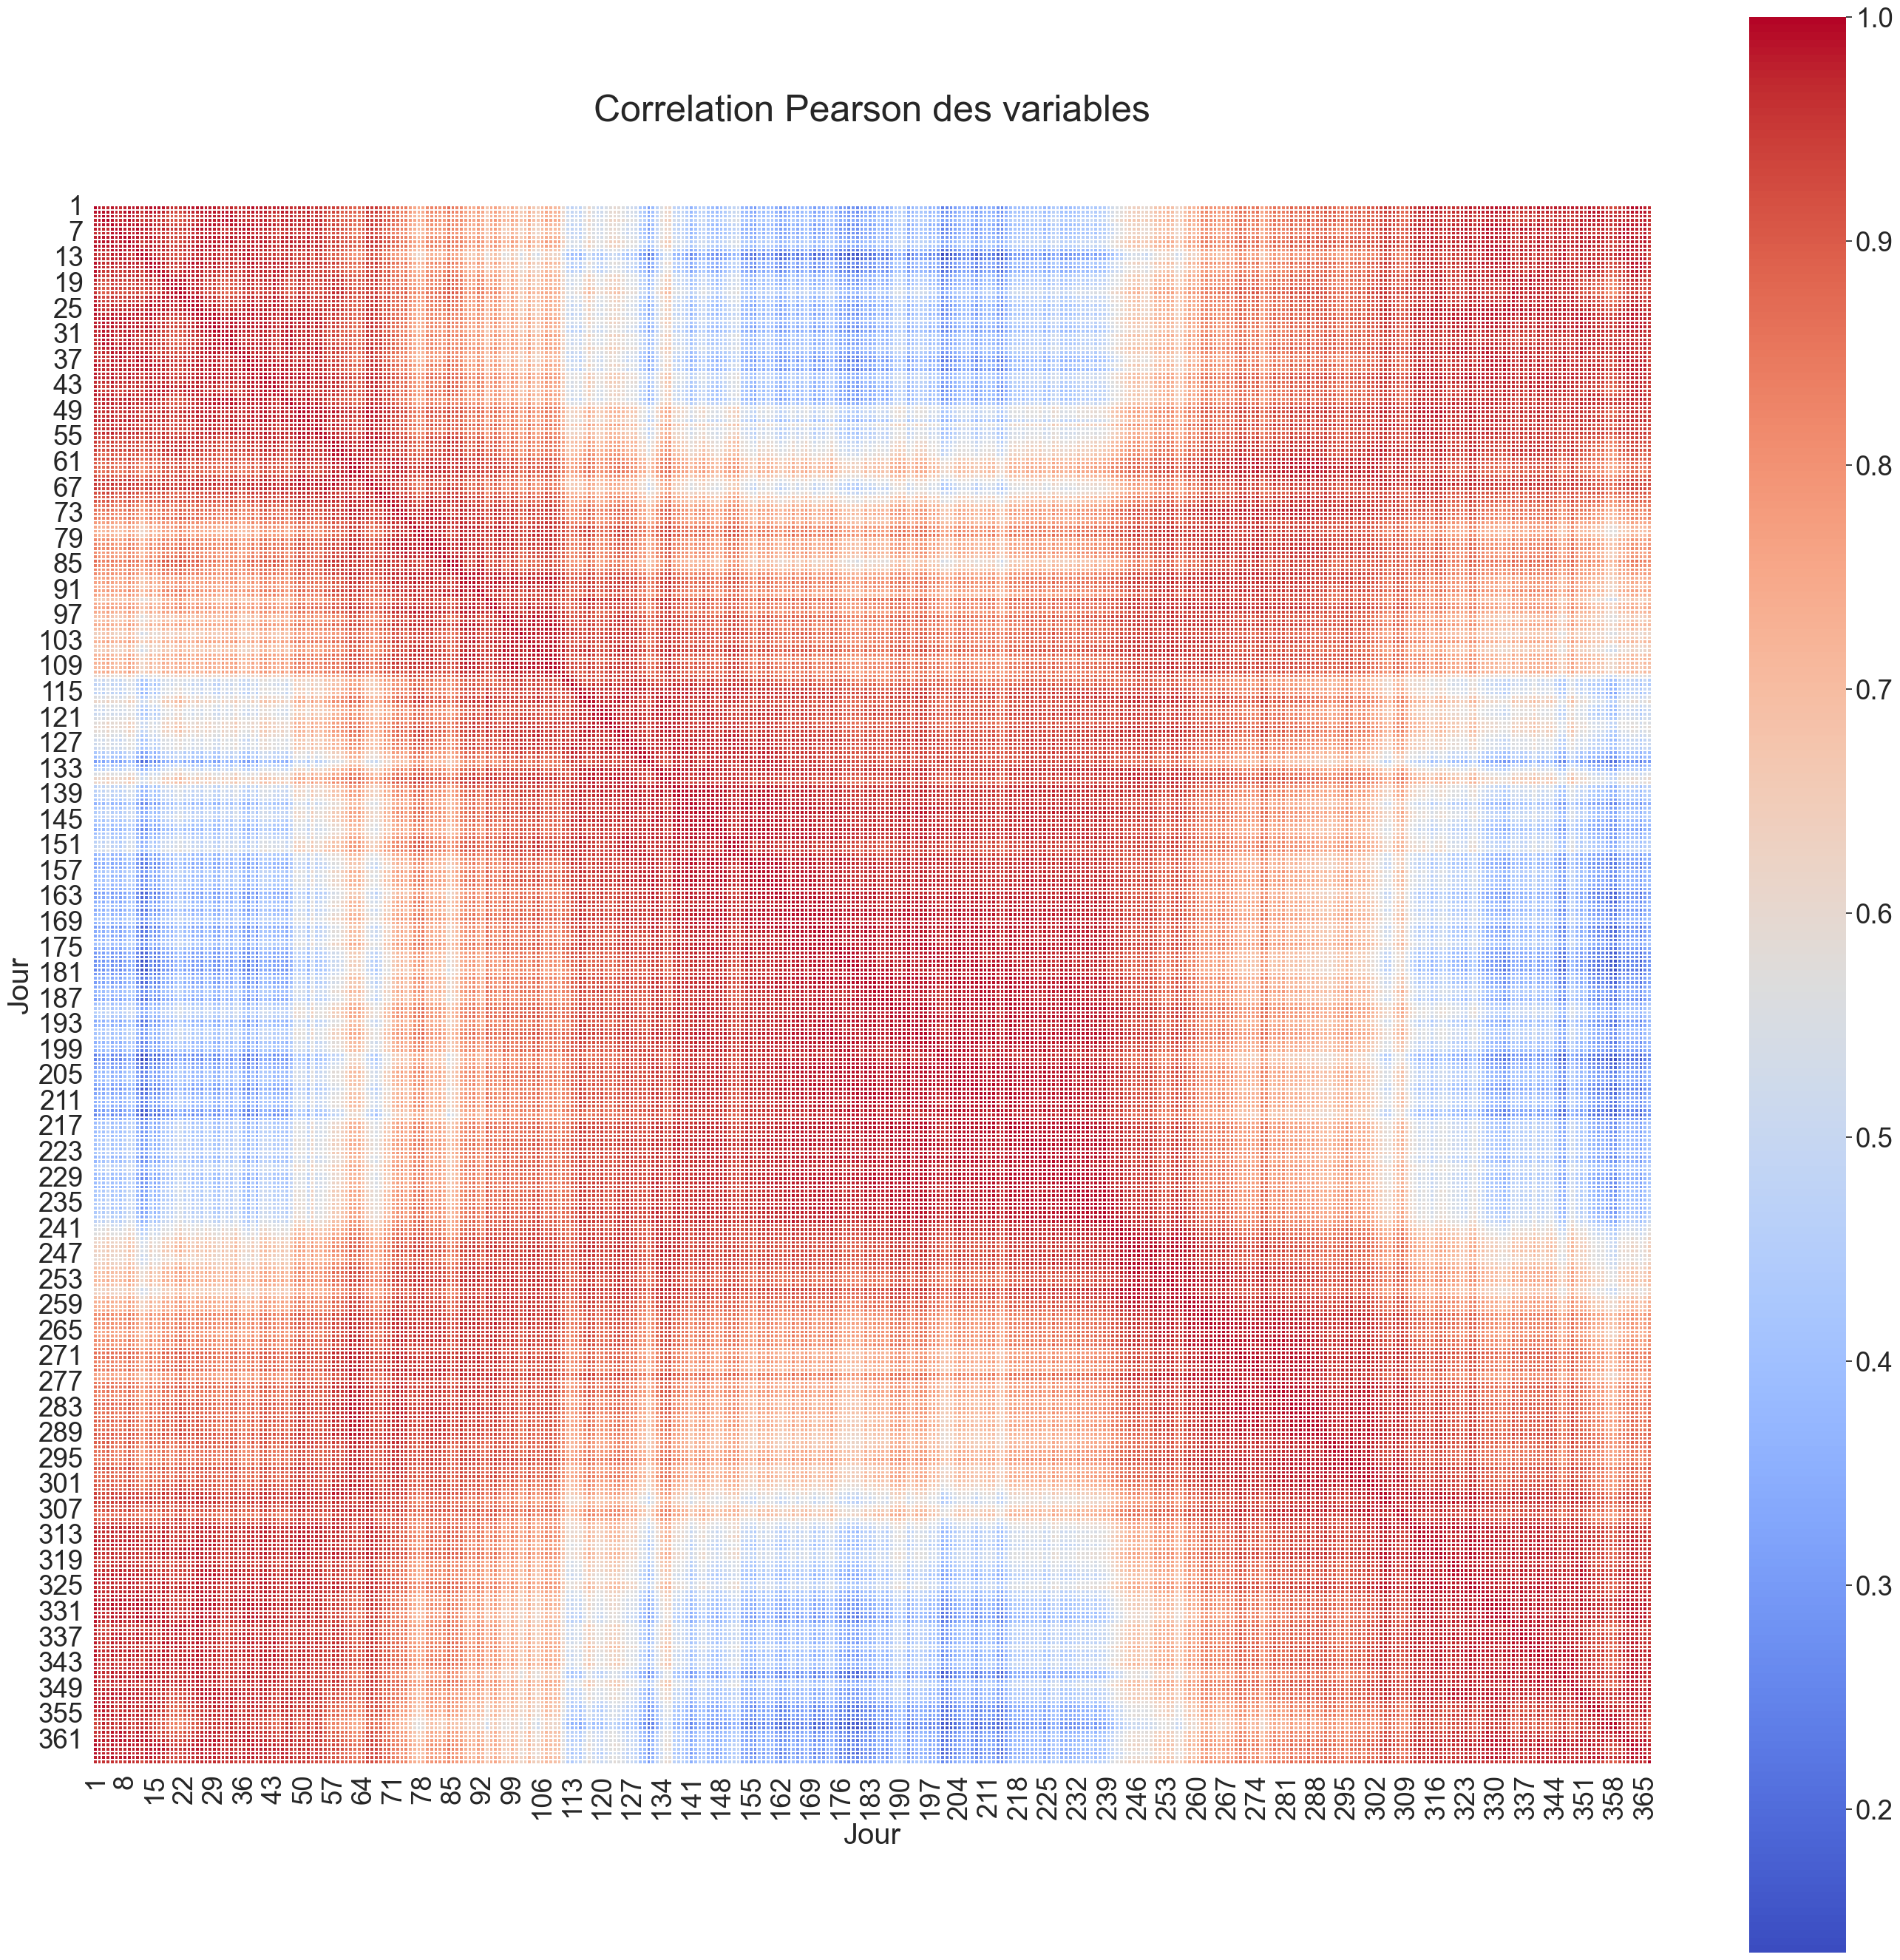

In [32]:
plt.figure(figsize=(34,34))
sns.set(font_scale=2.4)
plt.title('Correlation Pearson des variables', y=1.05, size=36)
sns.heatmap(temperatures.corr(),linewidths=0.3,vmax=1.0, fmt= '.2f', 
            square=True, cmap='coolwarm', linecolor='white')
sauvegarderImage('Correlation Pearson des variables initiales')
sns.set(font_scale=2)

## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Centrage et réduction des données</div></b>
<table>
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/moyenne.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/ecart_type.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/centrage_reduction.png"></th>
</tr>
</table>

In [9]:
modelStd = StandardScaler()
modelStd.fit(temperatures)
temperatures[temperatures.columns] = modelStd.transform(temperatures)
temperatures.head()

,,,,Jour,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
Nom,Latitude,Longitude,Altitude,Zone,,,,,,,,,,,,,,,,,,,,,
Abbeville,50.136000,1.834000,69,NO,-0.642492,-0.486483,-0.541850,-0.501033,-0.352364,-0.278393,-0.182319,-0.407915,-0.482093,-0.645272,...,-0.252266,-0.095568,-0.225100,-0.244857,-0.330761,-0.434263,-0.504674,-0.332410,-0.285301,-0.646248
Ajaccio,41.918000,8.792667,5,SE,1.632089,1.630780,1.610978,1.658737,1.696823,1.837871,1.868473,1.795576,1.842058,1.775007,...,1.526516,1.440486,1.622378,1.751172,1.666004,1.683323,1.695568,1.403261,1.507309,1.895595
Alencon,48.445500,0.110167,143,NO,-0.512704,-0.406468,-0.463700,-0.530521,-0.382193,-0.374954,-0.335945,-0.394659,-0.478717,-0.387463,...,-0.229663,-0.088196,-0.215615,-0.390700,-0.423238,-0.543490,-0.459160,-0.362284,-0.417240,-0.576407
Bale,47.614333,7.510000,263,NE,-1.622230,-1.618648,-1.379091,-1.436403,-1.339611,-1.383606,-1.367429,-1.659685,-1.534938,-1.446264,...,-1.468038,-1.646633,-1.341814,-1.433875,-1.487853,-1.500552,-1.332840,-1.606199,-1.619625,-1.470671
Bastia,42.540667,9.485167,10,SE,1.583823,1.700305,1.922898,1.684906,1.808966,1.731718,1.911518,1.839795,1.871246,1.799332,...,1.554755,1.386545,1.767777,2.003095,1.784315,1.573232,1.659223,1.525988,1.619193,1.562273


## <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Analyse en composantes principales</div></b>

<table>
<tr>
<th><div style='padding:15px;color:#030aa7;font-size:120%;text-align: center;font-family: Georgia, serif'>Quelle est la meilleure représentation simplifiée ?</div></th>
<th><div style='padding:15px;color:#030aa7;font-size:120%;text-align: center;font-family: Georgia, serif'>Recherche du meilleur axe de projection</div></th>
</tr>    
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/acp_analogie_photo.png" width="512"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/acp_projection_axe.png" width="512"></th>
</tr>
</table>    
<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left;font-family: Georgia, serif'>A l'évidence, c'est la vue de profil. La raison est que l'image projetée du chameau dans ce plan est plus proche de l'image initiale dans le sens ou la variance des points servant à sa représentation est plus grande et donc restitue mieux la variance des points d'origine.</div>
<table>
<tr>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/axe_variance_max.png"></th>
<th><img src="https://raw.githubusercontent.com/rbizoi/MachineLearning/refs/heads/master/images/max_dist.png"></th>
</tr>
</table>

In [10]:
modelPCA = PCA(svd_solver='full')
modelPCA.fit(temperatures)

PCA(svd_solver='full')

In [11]:
modelPCA.explained_variance_ratio_.cumsum()*100

array([ 78.05335512,  96.65395826,  97.66430846,  98.3185872 ,
        98.76306696,  98.95459363,  99.12528535,  99.26389435,
        99.3753027 ,  99.46641982,  99.52913189,  99.58078696,
        99.6292521 ,  99.67009272,  99.70387357,  99.73164966,
        99.75592075,  99.77887659,  99.79958448,  99.81860352,
        99.83617505,  99.85122542,  99.86544244,  99.87871746,
        99.89027427,  99.90171365,  99.91244703,  99.92244632,
        99.93163709,  99.94041213,  99.94816091,  99.95552779,
        99.96243331,  99.96842308,  99.97428543,  99.97970088,
        99.9845072 ,  99.98886898,  99.99310111,  99.99703619,
       100.        , 100.        ])

In [12]:
modelPCA.explained_variance_*100

array([2.92642969e+04, 6.97386516e+03, 3.78807394e+02, 2.45306655e+02,
       1.66647386e+02, 7.18084867e+01, 6.39969074e+01, 5.19682309e+01,
       4.17699787e+01, 3.41622561e+01, 2.35124352e+01, 1.93668732e+01,
       1.81708820e+01, 1.53122435e+01, 1.26653444e+01, 1.04140022e+01,
       9.09988431e+00, 8.60676088e+00, 7.76394291e+00, 7.13074631e+00,
       6.58804077e+00, 5.64278715e+00, 5.33033990e+00, 4.97716193e+00,
       4.33295991e+00, 4.28892940e+00, 4.02423080e+00, 3.74900248e+00,
       3.44586590e+00, 3.29000015e+00, 2.90522451e+00, 2.76204233e+00,
       2.58906446e+00, 2.24572389e+00, 2.19795223e+00, 2.03039596e+00,
       1.80201965e+00, 1.63534956e+00, 1.58673806e+00, 1.47536789e+00,
       1.11121136e+00, 5.77136495e-27])

In [13]:
modelPCA.n_components_

42

In [14]:
inertie = pd.DataFrame(modelPCA.explained_variance_ratio_,columns=['Inertie']) 
inertie['Label'] = np.round(modelPCA.explained_variance_ratio_.cumsum()*100,2)
inertie['Dimension'] = range(1,len(modelPCA.explained_variance_)+1)
inertie['Inertie'] = np.round(inertie['Inertie']*100,2)
dim = modelPCA.n_components_
inertie = inertie[inertie['Dimension']<= dim]

### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Choix du nombre des dimensions</div></b>
<div style='color:#aa0aa7;font-size:120%;text-align: left'>La qualité globale est mesurée par la part d'inertie expliquée. La valeur est choisie de sorte que cette part d'inertie expliquée soit supérieure à une valeur seuil fixée a priori par l'utilisateur.<br>C'est souvent le seul critère employé.<br><b>min 75%</b><br><br><b>95%</b></div>

In [15]:
sum(modelPCA.explained_variance_ratio_.cumsum()*100 <= 95) + 1

2

In [16]:
inertie[inertie.Dimension <= 2]

,Inertie,Label,Dimension
0,78.05,78.05,1
1,18.60,96.65,2


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Pourcentage d'inertie(variance) associée à chaque dimension</div></b>

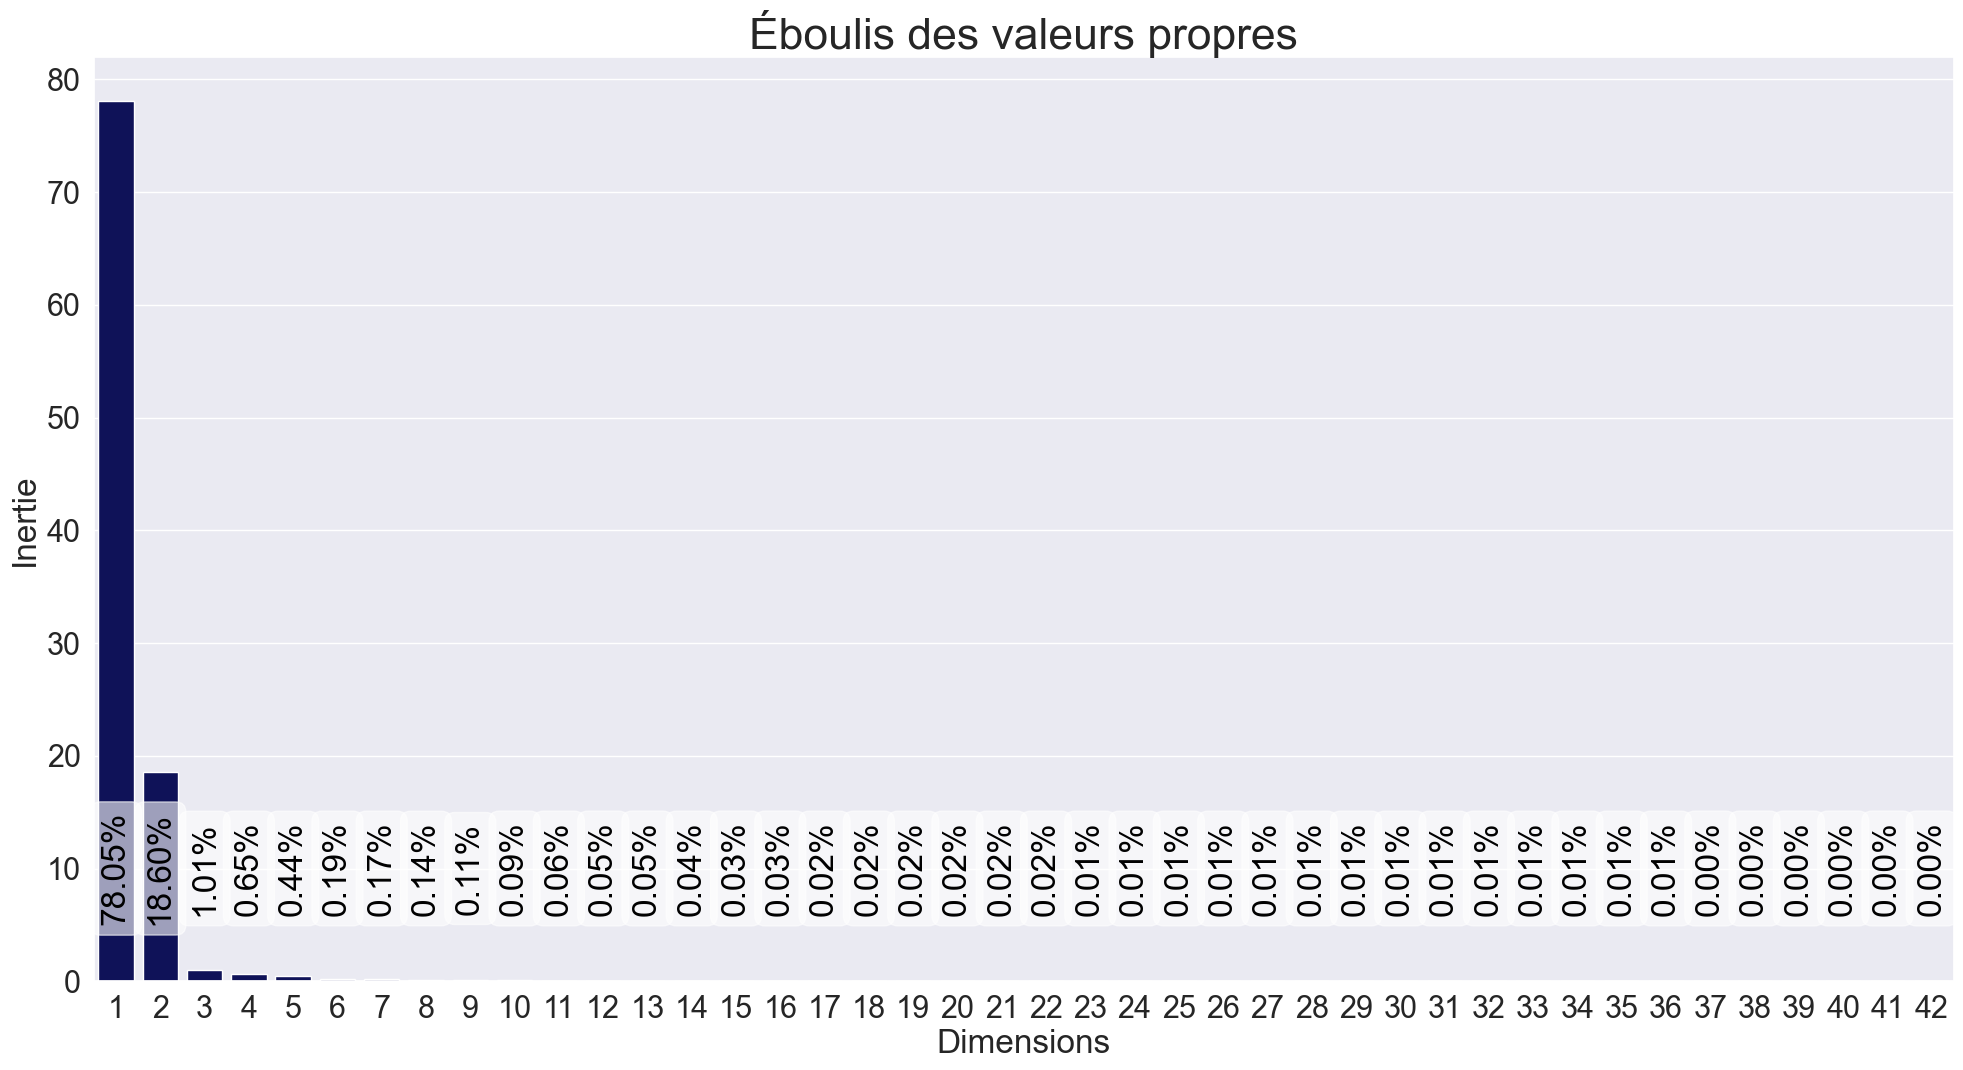

In [17]:
fig, ax = plt.subplots(figsize=(24,12));

graph = sns.barplot(x="Dimension",y='Inertie', data=inertie, color="#030764", ax=ax)

for i,nom in enumerate(inertie.sort_values('Inertie', ascending=False).Inertie):
    graph.text(
                i ,
                10,
                f'{nom:0.2f}%',
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');
ax.set_title('Éboulis des valeurs propres', fontproperties=fm.FontProperties(size=32))
sauvegarderImage('Choix du nombre des dimensions02--Temperatures')

C:\Users\etien\AppData\Local\Temp\ipykernel_203588\3493000147.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  graph = sns.lineplot( x=inertie.Dimension - 1,


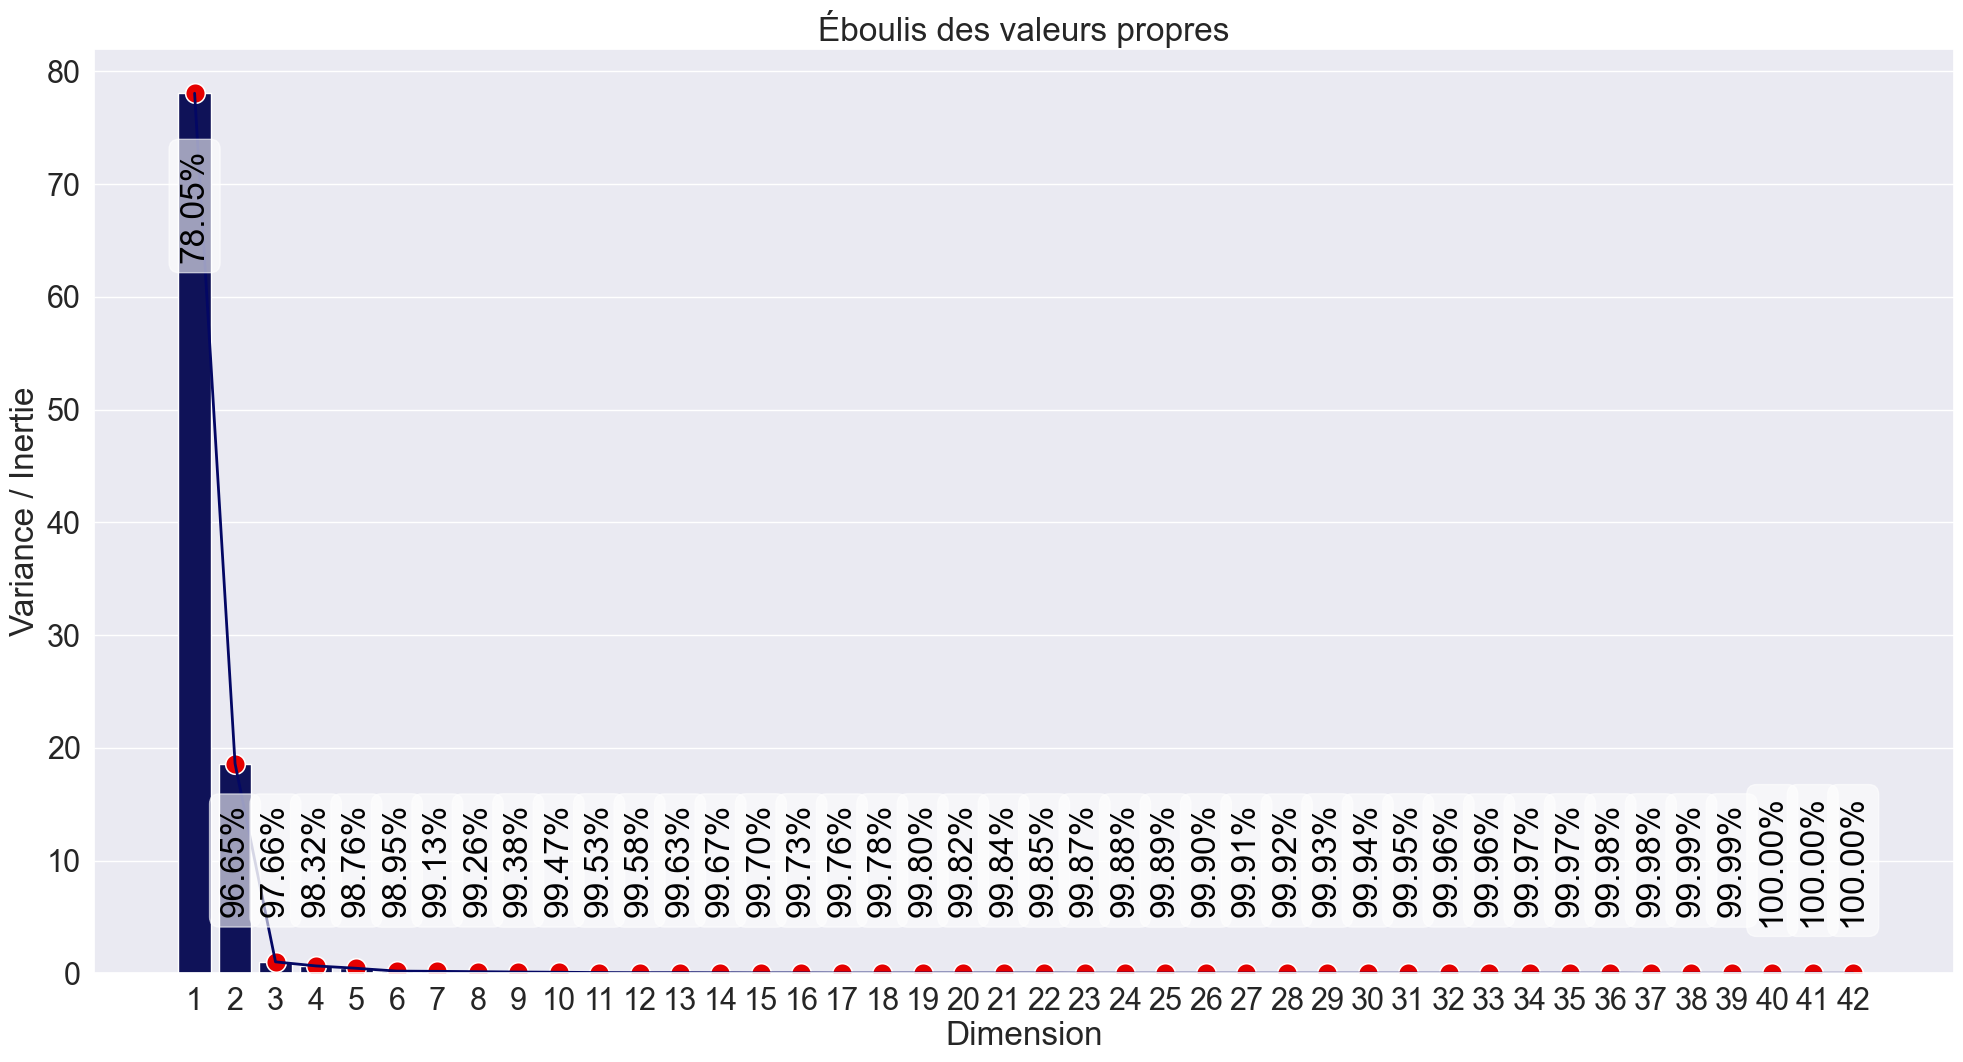

In [19]:
fig, ax = plt.subplots(figsize=(24,12));
graph = sns.barplot(x="Dimension",y='Inertie', data=inertie, color="#030764", ax=ax)

for i,(nom,valeur) in enumerate(zip(inertie.sort_values('Dimension').Label,inertie.sort_values('Dimension').Inertie)):
    # valeur = 0.1 if valeur - 0.1 < 0.1 else valeur - 0.1
    valeur = 10 if valeur - 10 < 10 else valeur - 10
    delta =  i 
    graph.text(
                delta ,
                valeur,
                f'{nom:0.2f}%',
                color='black',
                rotation='vertical',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.6),
                verticalalignment='center',
                horizontalalignment='center',
               )
    
graph = sns.lineplot( x=inertie.Dimension - 1,
                      y='Inertie',
                      data=inertie,
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
                      color     = "#030764",
                      ax    = ax);

sns.scatterplot(x=inertie.Dimension - 1,
                y     = 'Inertie',
                data  = inertie,
                s     = 200,
                # ci    = None, 
                color = "#e50000",
                ax    = ax);    
    
ax.set_xlabel('Dimension')
ax.set_ylabel('Variance / Inertie')
ax.set_title('Éboulis des valeurs propres')

sauvegarderImage('Choix du nombre des dimensions01--Temperatures')
sns.set(font_scale=2)

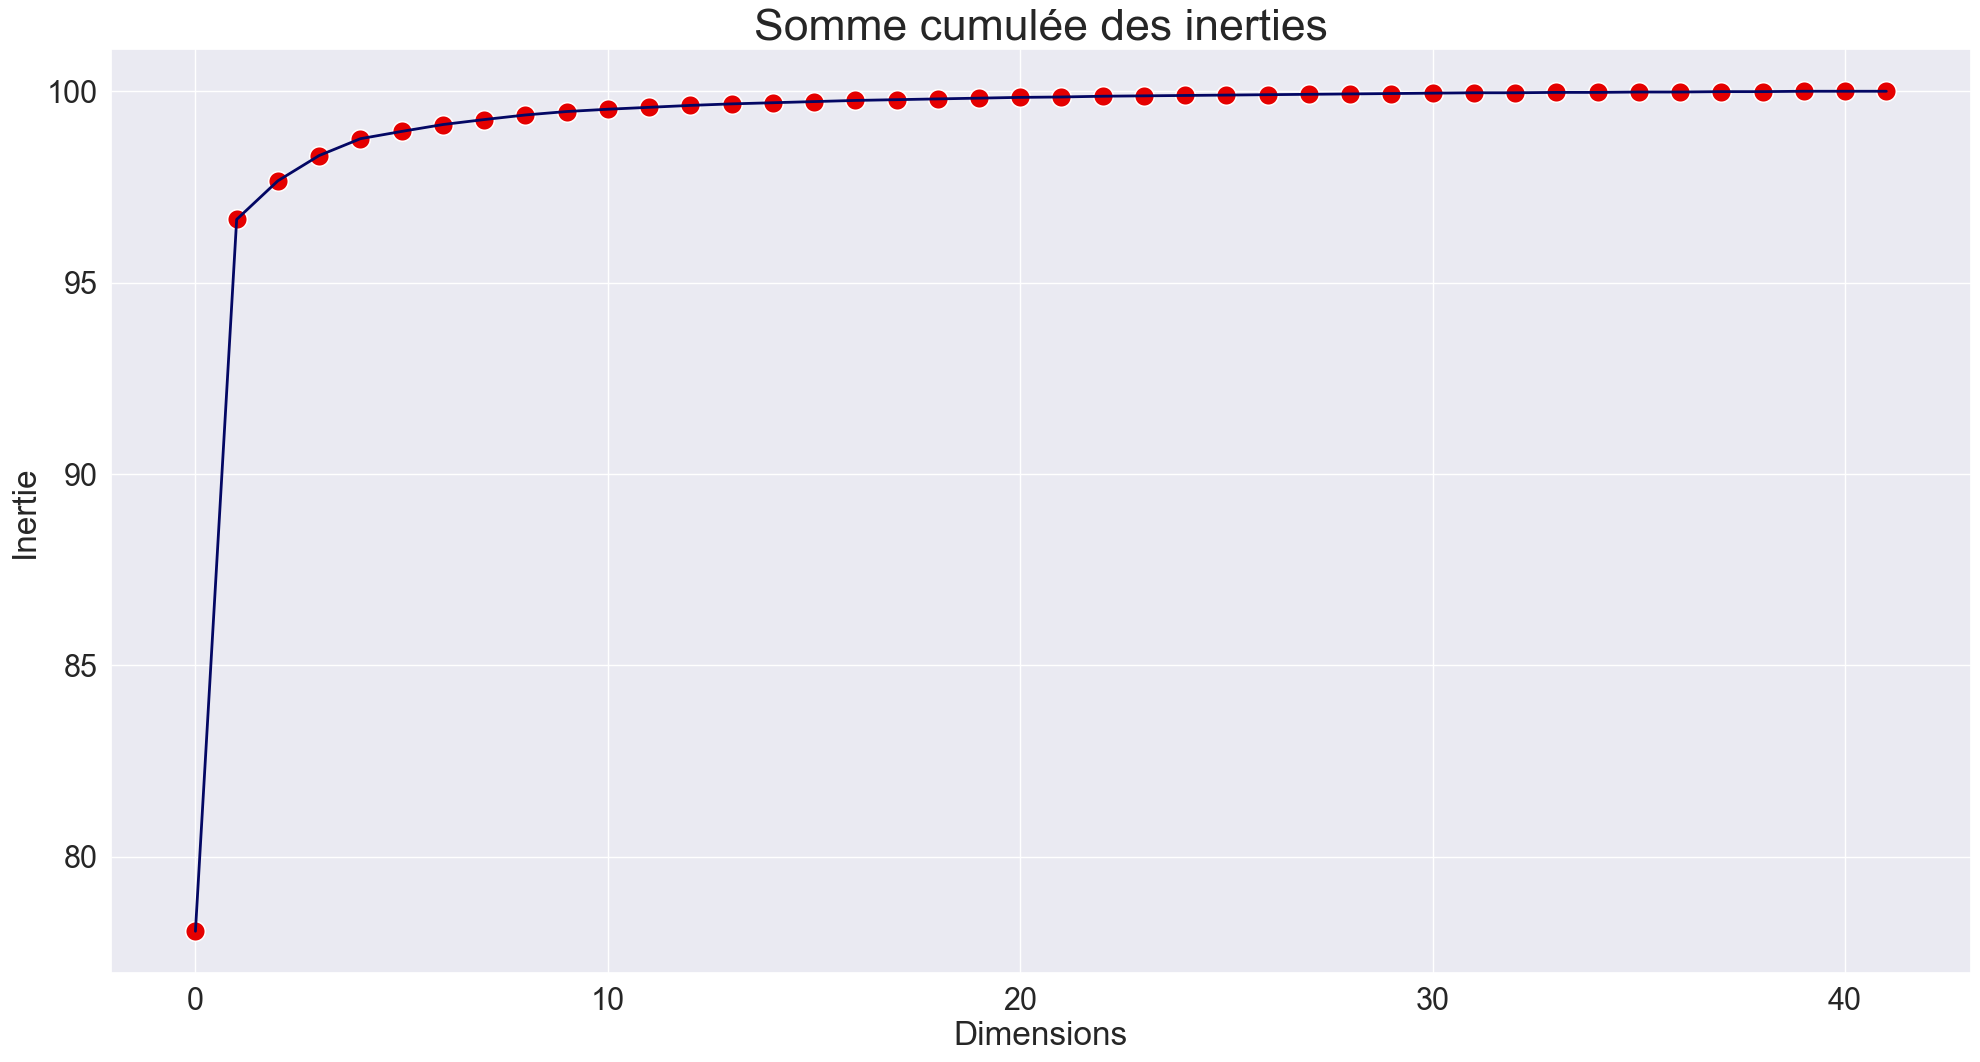

In [20]:
fig, ax = plt.subplots(figsize=(24,12));

sns.lineplot(x         = inertie.Dimension-1,
             y         = 'Label',
             data      = inertie,
             estimator = None, 
             lw        = 2, 
             color     = "#030764",
             ax        = ax);
sns.scatterplot(x     = inertie.Dimension-1,
                y     = 'Label',
                data  = inertie,
                s     = 200,
                color = "#e50000",
                ax    = ax);

ax.set_xlabel('Dimensions');
ax.set_ylabel('Inertie');
ax.set_title('Somme cumulée des inerties', fontproperties=fm.FontProperties(size=32));
sauvegarderImage('Choix du nombre des dimensions02--Temperatures')

### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Règle de Kaiser</div></b>

<div style='color:#aa0aa7;font-size:120%;text-align: left'>On ne conserve que les valeurs propres supérieures à leur moyenne car les autres représentent moins de variabilité qu'une seule variable initiale.</div>

In [21]:
print(f'{100 / modelPCA.n_components_}')

2.380952380952381


In [22]:
inertie[inertie.Inertie >= (100 / modelPCA.n_components_)]

,Inertie,Label,Dimension
0,78.05,78.05,1
1,18.60,96.65,2


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Influence des variables dans les nouvelles dimensions</div></b>

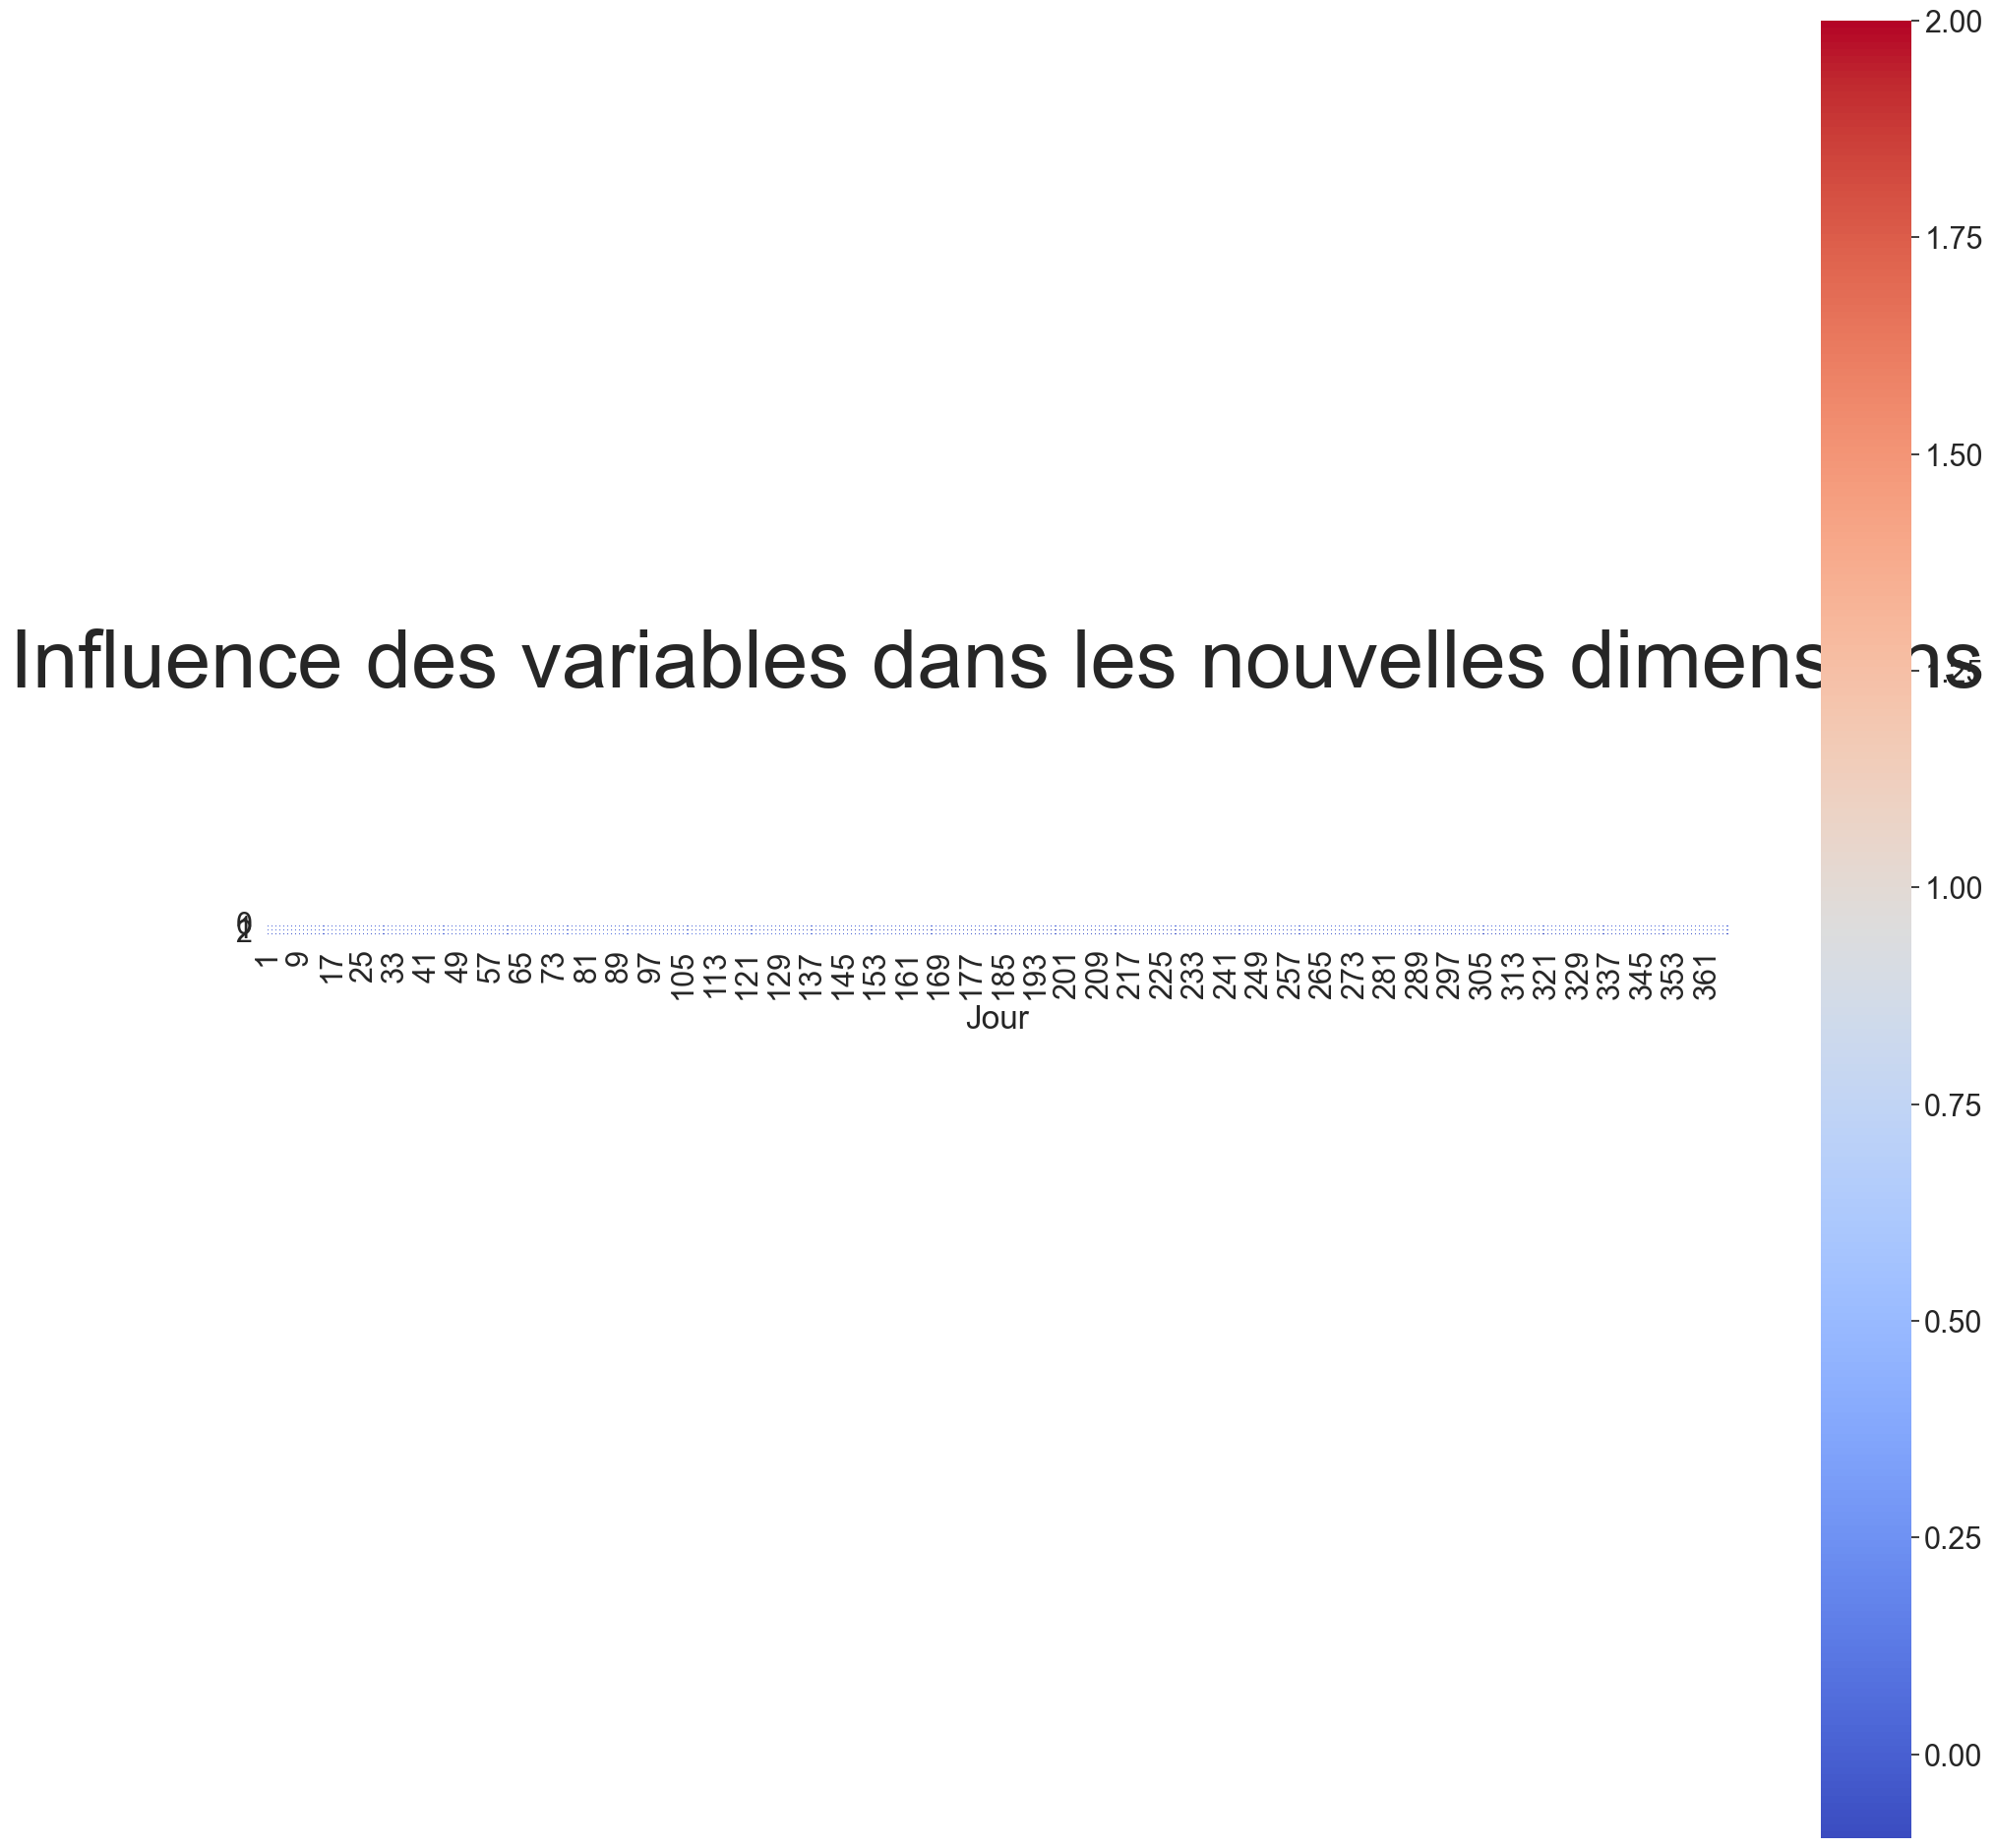

In [ ]:
plt.figure(figsize=(24,24))
sns.set(font_scale=2)
plt.title("Influence des variables dans les nouvelles dimensions", y=20, size=60)

sns.heatmap(pd.DataFrame(modelPCA.components_, 
                         columns=temperatures.columns),
                         #index=[f'Dimmension{i:02d}' for i in range(1,367)]),
            fmt= '.2f',linewidths=2,vmax=2, 
            square=True, cmap='coolwarm', linecolor='white')
sauvegarderImage('Influence des variables dans les nouvelles dimensions--Temperatures')

### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Transformation des données</div></b>

In [34]:
n_components = sum(modelPCA.explained_variance_ratio_.cumsum() < .95 ) + 1 
modelPCA = PCA(n_components=n_components).set_output(transform="pandas")
donnees2d = modelPCA.fit_transform(temperatures)
donnees2d.columns = [f'Dimension{i:02d}' for i in range(1,n_components+1)]

In [35]:
n_components=3
modelPCA = PCA(n_components=n_components).set_output(transform="pandas")
# donnees3d = pd.DataFrame(x_proj, index=temperatures.index, columns=[f'Dimension{i:02d}' for i in range(1,n_components+1)])
donnees3d = modelPCA.fit_transform(temperatures)
donnees3d.columns = [f'Dimension{i:02d}' for i in range(1,n_components+1)]

<div style='padding:15px;color:#030aa7;font-size:120%;text-align: left;font-family: Georgia, serif'>Les nouvelles dimensions doivent être indépendantes deux à deux</div>

In [36]:
donnees2d.corr().style.format("{:0.1e}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

,Dimension01,Dimension02
Dimension01,1.0e+00,-2.3e-16
Dimension02,-2.3e-16,1.0e+00


In [37]:
donnees3d.corr().style.format("{:0.1e}").background_gradient(cmap=plt.get_cmap('Blues'),axis=0)

,Dimension01,Dimension02,Dimension03
Dimension01,1.0e+00,-2.3e-16,5.5e-17
Dimension02,-2.3e-16,1.0e+00,-2.3e-17
Dimension03,5.5e-17,-2.3e-17,1.0e+00


### <b><div style='padding:15px;background-color:#d8dcd6;color:#030aa7;font-size:120%;text-align: left'>Représentation des individus</div></b>

C:\Users\etien\AppData\Local\Temp\ipykernel_203588\1369342325.py:4: UserWarning: The palette list has more values (18) than needed (4), which may not be intended.
  sns.scatterplot(x       = 'Dimension01',


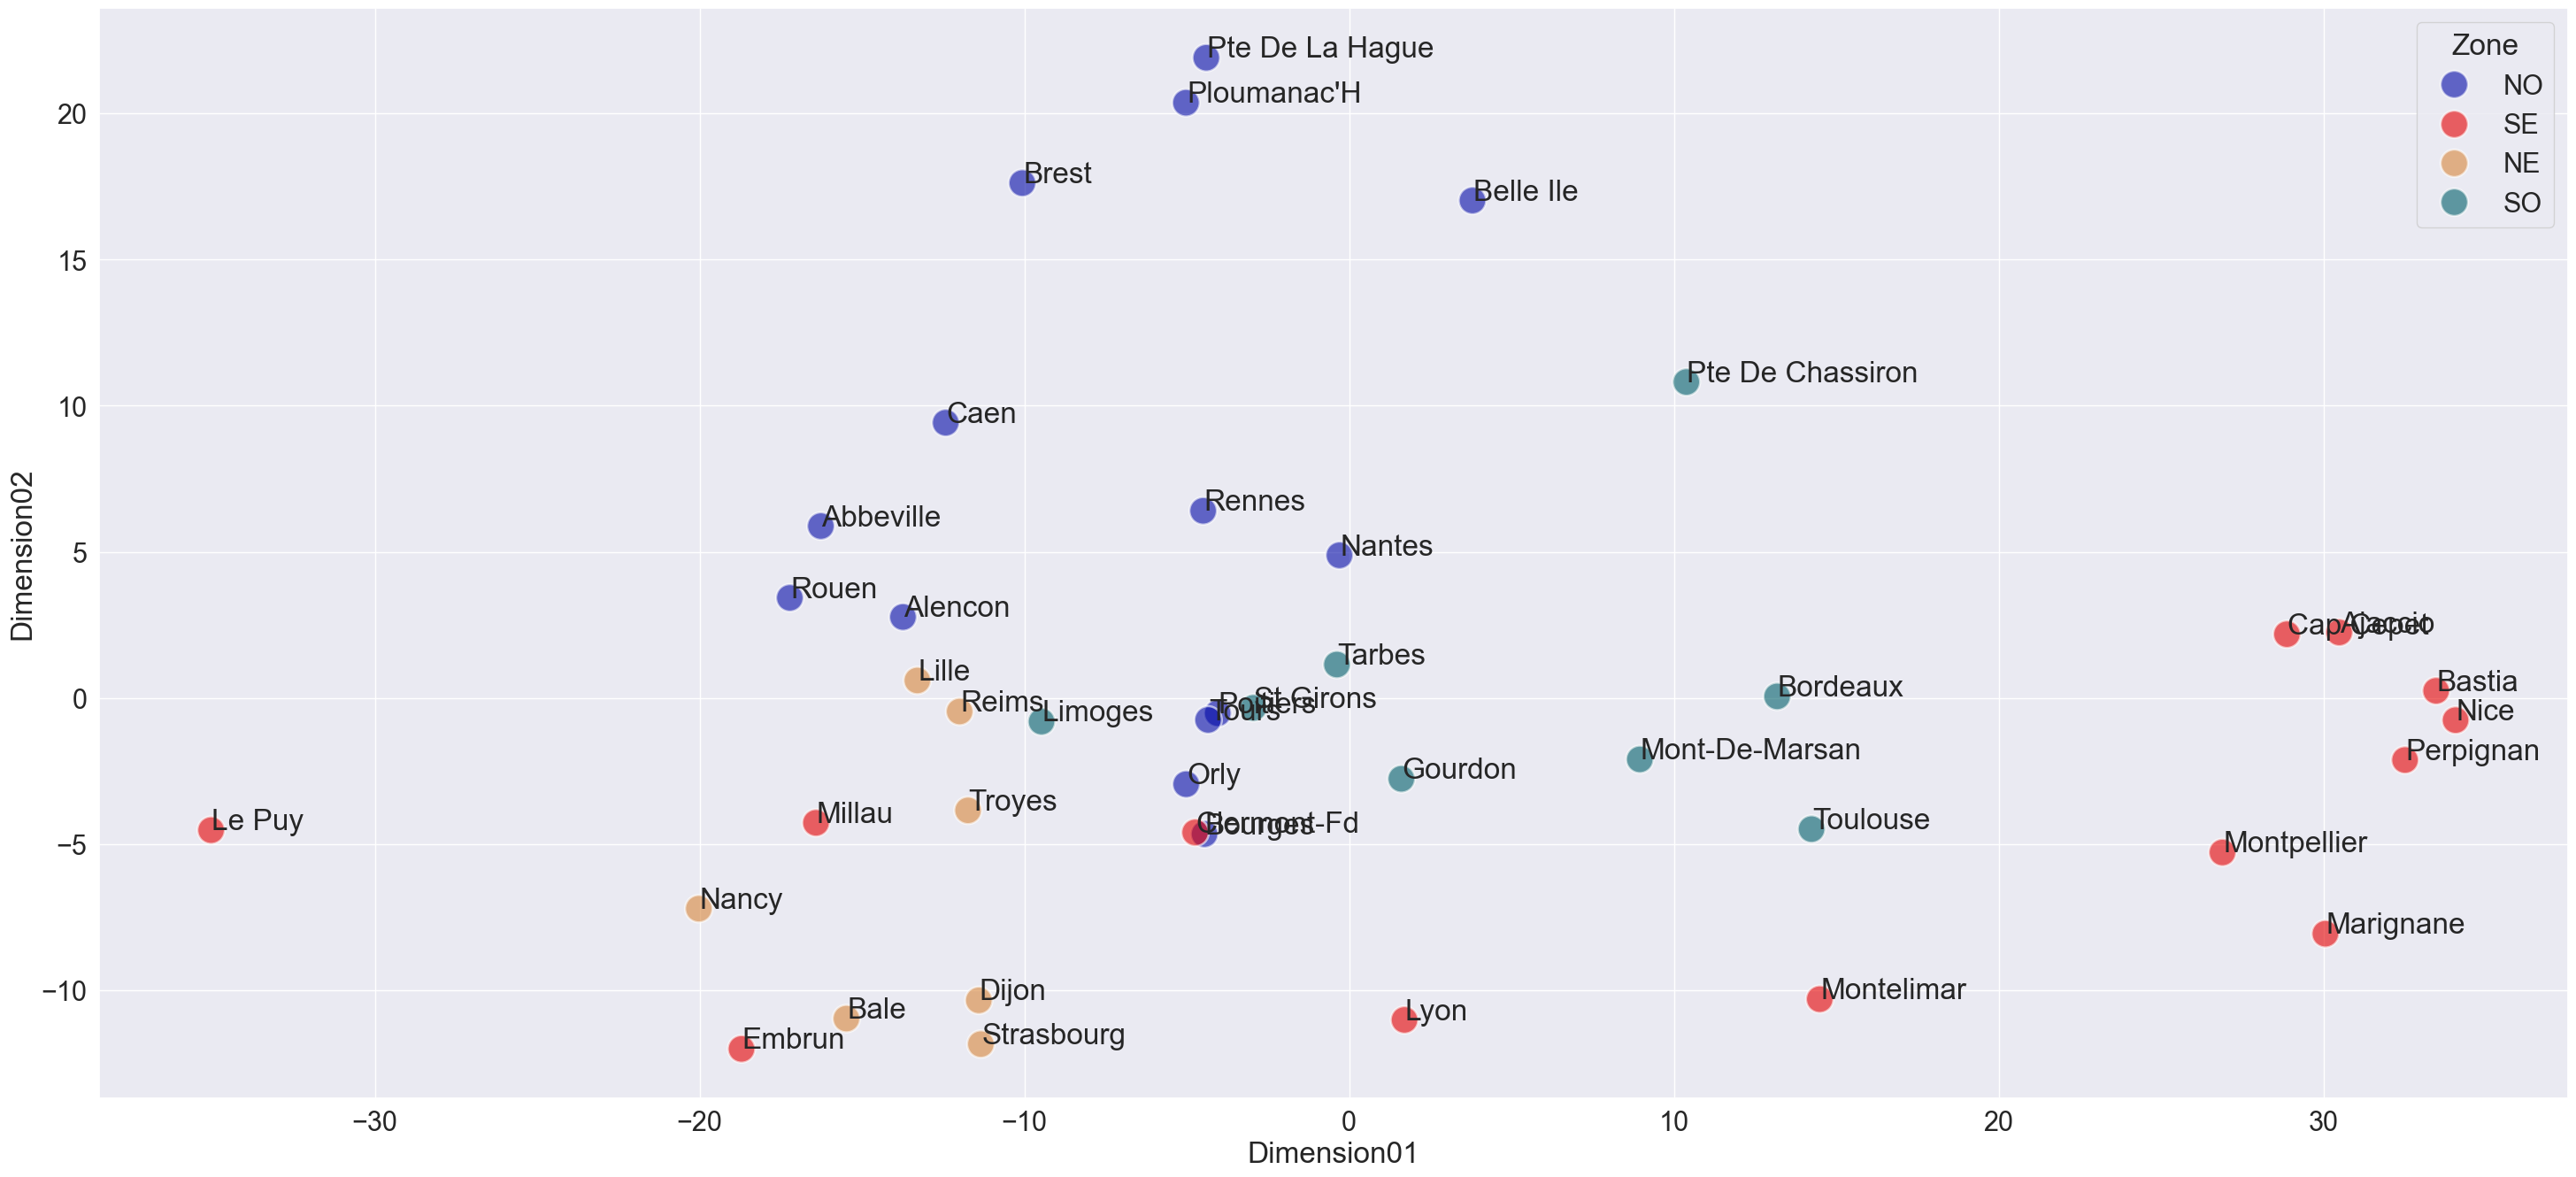

In [38]:
fig, ax = plt.subplots(figsize=(36,16));

affichage = donnees2d.reset_index()
sns.scatterplot(x       = 'Dimension01', 
                y       = 'Dimension02',
                # size    = 'Altitude', 
                hue     = 'Zone', 
                data    = affichage,
                s       = 500,
                palette = palette,
                alpha=0.6,
                ax=ax
                );

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y']+.02, str(point['val']), rotation=0)

label_point(affichage.Dimension01, affichage.Dimension02, affichage.Nom, ax)        
# sauvegarderImage('Influence des variables dans les nouvelles dimensions--Temperatures')

In [39]:
layout = go.Layout({"showlegend": False})

fig = px.scatter_3d(donnees3d.reset_index(), 
                    x='Dimension01', 
                    y='Dimension02', 
                    z='Dimension03',
                    color='Zone',
#                     size=100+donnees3d.reset_index().Altitude,
#                     symbol=donnees.CD23.cat.codes,
                    text='Nom',
                    width=1024,
                    height=1024,
                   )

fig.show()